# SMS SPAM DETECTION DATASET

In [1]:
#Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING THE DATASET

In [4]:
data = pd.read_csv('C:/Users/ASUS/Downloads/spam.csv', encoding ='ISO-8859-1')
data.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace =True)

In [6]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.shape

(5572, 2)

# DATA CLEANING

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#DROPPING DUPLICATE VALUES

In [9]:
data.drop_duplicates(inplace =True)

In [10]:
data.shape

(5169, 2)

In [11]:
# MISSING VALUES

In [12]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

# EDA

In [13]:
data['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

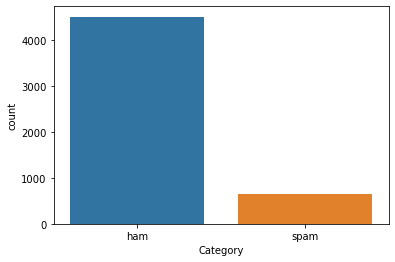

In [14]:
sns.countplot('Category',data=data)

In [15]:
data_ohe = pd.get_dummies(data['Category'], drop_first= True)
data_ohe.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [16]:
# here we have te value 0 for ham and  1 for spam

In [17]:
data =pd.concat([data,data_ohe], axis=1)
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
data.drop('Category',axis =1,inplace=True)
data.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
data.rename(columns={'spam':'Target'},inplace =True)

In [20]:
data.head()

,Message,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
# we have to calculate how many sentances ,words and charecters are used in the messages

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
data['num_char']= data['Message'].apply(len)   # creating column for num of charecters in the meassages
data.head()

,Message,Target,num_char
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [26]:
#creating a column for nu of word in mwssages
data['num_word']=data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
data.head()


,Message,Target,num_char,num_word
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [28]:
#creating column for no of sentences

In [29]:
data['num_sent']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Message,Target,num_char,num_word,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [30]:
data[data['Target']==0][['num_char','num_word','num_sent']].describe() # for ham dataset 

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#here we can see that for ham mesaages the max no of words  is 220 and charecters is 910 no of sentence is 38
#In total there are 4516 rows of ham datas

In [32]:
data[data['Target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#Comparing with ham datas spam messages are having very less no of charecters ,words and sentences

Text(0.5, 1.0, 'Ham and Spam messages ')

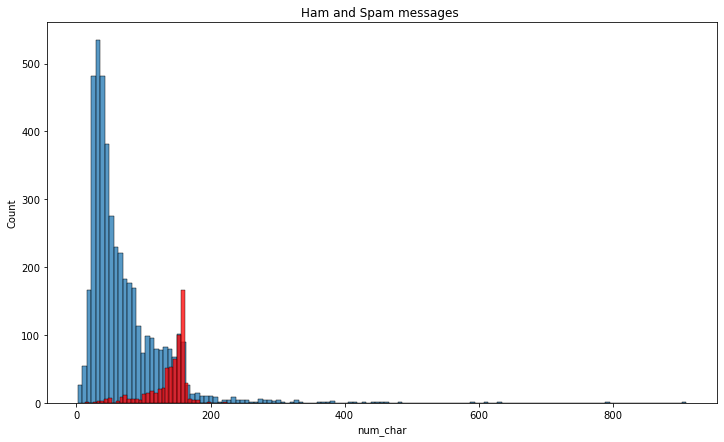

In [34]:
plt.figure(figsize=(12,7))
sns.histplot(data[data['Target']==0]['num_char']) #for ham messages
sns.histplot(data[data['Target']==1]['num_char'],color='red') #for spam
plt.title('Ham and Spam messages ')

Text(0.5, 1.0, 'Ham and Spam messages ')

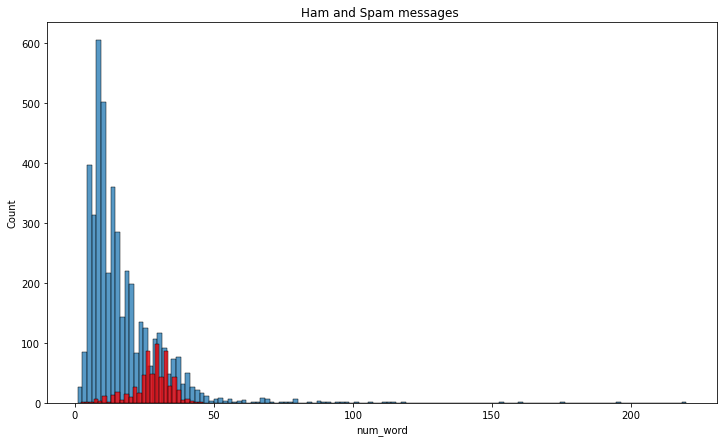

In [35]:
plt.figure(figsize=(12,7))
sns.histplot(data[data['Target']==0]['num_word']) #for ham messages
sns.histplot(data[data['Target']==1]['num_word'],color='red') #for spam
plt.title('Ham and Spam messages ')

<AxesSubplot:>

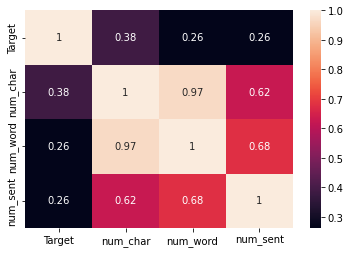

In [36]:
corr =data.corr()
sns.heatmap(corr,annot= True)

In [37]:
#here we can seethat there is a strong corelation between varieble there is multicolinearity

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Finding out the top words used in HAm and Spam messages

In [41]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('Dancing')

'danc'

In [42]:
def transform_text(text):
    text=text.lower()                         #lowercase
    text=nltk.word_tokenize(text )             #tokenising
    y=[]
    for i in text:
        if i.isalnum():                            #removing special cahrecters
            y.append(i)
    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text =y[:]
    y.clear()
    
    for  i in text:
            y.append(ps.stem(i))     #stemming
            
          
            
    return " ".join(y)

In [43]:
transform_text(data['Message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
data['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
# creating a extra column of transformed texts

In [46]:
data['Transformed_text'] = data['Message'].apply(transform_text)

In [47]:
data.head()

,Message,Target,num_char,num_word,num_sent,Transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [48]:
#Using wordcloud to highlight the important words

In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=500,min_font_size=12,background_color='black')

In [51]:
spam_wc = wc.generate(data[data['Target']== 1]['Transformed_text'].str.cat(sep=' '))    #wordcloud for spam messages showing most occuring words

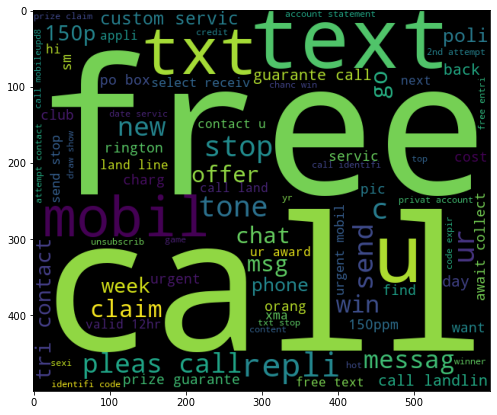

In [52]:
plt.figure(figsize=(10,7))
plt.imshow(spam_wc)

In [53]:
#here are the words that occur in spam messages most commonly free,call,text etc are the most occuring words

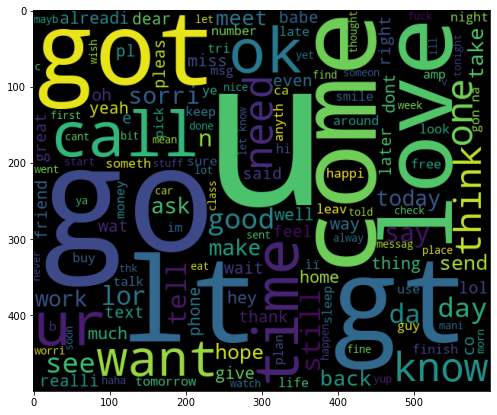

In [54]:
ham_wc = wc.generate(data[data['Target']== 0]['Transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)   #for ham messages 

In [55]:
# for personal messages we can see that call,love,u,come occures moslty

In [56]:
from collections import Counter
#importing counter so that we can count the words that occur mostly

In [57]:
spam_corpus=[]
for msg in (data[data['Target']==1]['Transformed_text'].tolist()):
    for words in msg.split():
        spam_corpus.append(words)

In [58]:
len(spam_corpus)

9939

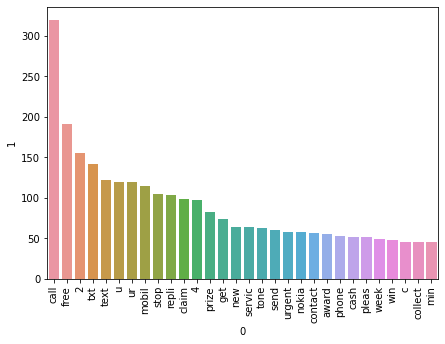

In [59]:
plt.figure(figsize=(7,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

here we can see that call is the most occuring word followed by free these are alll the common words which we can see in our spam messgaes also,because these messages gives mostly offers 

In [60]:
ham_corpus=[]
for msg in (data[data['Target']==0]['Transformed_text'].tolist()):
    for words in msg.split():
        ham_corpus.append(words)
        


In [61]:
len(ham_corpus)

35404

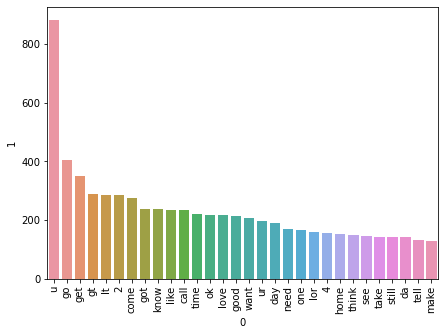

In [62]:
plt.figure(figsize=(7,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

for ham messages we can see that u,go, get,love like etc words are most occuring which we can relate to our personal and official messages


# MODEL BUILDING

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()

In [64]:
x = cv.fit_transform(data['Transformed_text']).toarray()

In [65]:
x.shape

(5169, 6708)

In [66]:
y =data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [71]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [74]:
#model using tfidf to get more precise and accurate values

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [76]:
x = tfidf.fit_transform(data['Transformed_text']).toarray()


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [79]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [80]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [81]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## here we can go with mnb or bnb 
  since precision score matters motre than accuracy score 
  we can go for Multinomial naive bayes